In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker 
import matplotlib.ticker as ticker
import tabula 

In [3]:
# Import in CSV files from resources 
cost_data_to_load = "resources\COST_DATA.csv"
cost_data = pd.read_csv(cost_data_to_load)
cost_data

,Vehicle,Operator,Year_of_First_Launch,Total_2017_Launches,Active_Launch_Sites,Min_Mass_to_LEO_KG,Max_Mass_to_LEO_kg,Min_Mass_to_Sso_kg,Max_Mass_to_SSO_kg,Min_Mass_to_GTO_kg,Max_Mass_to_GTO_kg,Cost_Min,Cost_Max
0,Antares,Orbital ATK,2013.0,1.0,MARS,3500.0,7000.0,2100.0,"3,400",NaN,NaN,"$80,000,000.00","$85,000,000"
1,Atlas V,ULA and LMCLS,2002.0,6.0,CCAFS-VAFB,8123.0,18814.0,6424.0,"15,179","3,460","8,900","$110,000,000.00","$230,000,000"
2,Electron,Rocket Lab,2017.0,1.0,PSCA MAHIA . NZ,NaN,150.0,NaN,NaN,$4.9M,NaN,"$164,000,000.00","$400,000,000"
3,Falcon 9,SpaceX,2010.0,18.0,CCAFS-VAFB-KSC,NaN,13150.0,NaN,NaN,4850,"4,850","$61,200,000",NaN
4,Minotaur-C,Orbital ATK,2017.0,1.0,CCAFS-MARS-VAFB-WFF,1278.0,1458.0,912.0,"1,054",NaN,NaN,"$40,000,000.00","$50,000,000"
5,Pegasus XL,Orbital ATK,1994.0,0.0,CCAFS-KWAJALEIN-VAFB-WFF,NaN,450.0,NaN,325,NaN,NaN,"$40,000,000",NaN
6,Aplha,Firefly Aerospace,NaN,NaN,NaN,NaN,1000.0,NaN,650,NaN,NaN,"$10,000,000",NaN
7,Cab-3A,CubeCeb,2017.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,"$250,000",NaN
8,Falcon-Heavy,SpaceX,2017.0,NaN,KSC VAFB,NaN,63800.0,NaN,NaN,NaN,"26,700","$270,000,000",NaN
9,LauncherOne,Virgin Orbit,2017.0,NaN,Spaceport America,NaN,500.0,NaN,300,NaN,NaN,"$10,000,000",NaN


In [4]:
cost_data.dtypes

Vehicle                  object
Operator                 object
Year_of_First_Launch    float64
Total_2017_Launches     float64
Active_Launch_Sites      object
Min_Mass_to_LEO_KG      float64
Max_Mass_to_LEO_kg      float64
Min_Mass_to_Sso_kg      float64
Max_Mass_to_SSO_kg       object
Min_Mass_to_GTO_kg       object
Max_Mass_to_GTO_kg       object
Cost_Min                 object
Cost_Max                 object
dtype: object

In [5]:
cost_data['Cost_Min'] = cost_data['Cost_Min'].str.replace(',', '')
cost_data['Cost_Min'] = cost_data['Cost_Min'].str.replace('$', '')
cost_data['Cost_Min'] 

0      80000000.00
1     110000000.00
2     164000000.00
3         61200000
4      40000000.00
5         40000000
6         10000000
7           250000
8        270000000
9         10000000
10             NaN
11             NaN
12             NaN
13         3000000
14     85000000.00
Name: Cost_Min, dtype: object

In [6]:
cost_data = cost_data.dropna(subset=['Cost_Min'])
cost_data

,Vehicle,Operator,Year_of_First_Launch,Total_2017_Launches,Active_Launch_Sites,Min_Mass_to_LEO_KG,Max_Mass_to_LEO_kg,Min_Mass_to_Sso_kg,Max_Mass_to_SSO_kg,Min_Mass_to_GTO_kg,Max_Mass_to_GTO_kg,Cost_Min,Cost_Max
0,Antares,Orbital ATK,2013.0,1.0,MARS,3500.0,7000.0,2100.0,"3,400",NaN,NaN,80000000.00,"$85,000,000"
1,Atlas V,ULA and LMCLS,2002.0,6.0,CCAFS-VAFB,8123.0,18814.0,6424.0,"15,179","3,460","8,900",110000000.00,"$230,000,000"
2,Electron,Rocket Lab,2017.0,1.0,PSCA MAHIA . NZ,NaN,150.0,NaN,NaN,$4.9M,NaN,164000000.00,"$400,000,000"
3,Falcon 9,SpaceX,2010.0,18.0,CCAFS-VAFB-KSC,NaN,13150.0,NaN,NaN,4850,"4,850",61200000,NaN
4,Minotaur-C,Orbital ATK,2017.0,1.0,CCAFS-MARS-VAFB-WFF,1278.0,1458.0,912.0,"1,054",NaN,NaN,40000000.00,"$50,000,000"
5,Pegasus XL,Orbital ATK,1994.0,0.0,CCAFS-KWAJALEIN-VAFB-WFF,NaN,450.0,NaN,325,NaN,NaN,40000000,NaN
6,Aplha,Firefly Aerospace,NaN,NaN,NaN,NaN,1000.0,NaN,650,NaN,NaN,10000000,NaN
7,Cab-3A,CubeCeb,2017.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,250000,NaN
8,Falcon-Heavy,SpaceX,2017.0,NaN,KSC VAFB,NaN,63800.0,NaN,NaN,NaN,"26,700",270000000,NaN
9,LauncherOne,Virgin Orbit,2017.0,NaN,Spaceport America,NaN,500.0,NaN,300,NaN,NaN,10000000,NaN


In [7]:
cost_data['Cost_Min'] = cost_data['Cost_Min'].astype(float)

<ipython-input-7-1a3a4ba31b94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cost_data['Cost_Min'] = cost_data['Cost_Min'].astype(float)


In [8]:
cost_data['Cost_Max'] = cost_data['Cost_Max'].str.replace(',', '')
cost_data['Cost_Max'] = cost_data['Cost_Max'].str.replace('$', '')
cost_data['Cost_Max'] 

<ipython-input-8-fa5d42f21f85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cost_data['Cost_Max'] = cost_data['Cost_Max'].str.replace(',', '')
<ipython-input-8-fa5d42f21f85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cost_data['Cost_Max'] = cost_data['Cost_Max'].str.replace('$', '')


0      85000000
1     230000000
2     400000000
3           NaN
4      50000000
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
13          NaN
14    172500000
Name: Cost_Max, dtype: object

In [9]:
cost_data['Cost_Max'] = cost_data['Cost_Max'].astype(float)

<ipython-input-9-cb22d4bc20a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cost_data['Cost_Max'] = cost_data['Cost_Max'].astype(float)


In [10]:
cost_data.dtypes

Vehicle                  object
Operator                 object
Year_of_First_Launch    float64
Total_2017_Launches     float64
Active_Launch_Sites      object
Min_Mass_to_LEO_KG      float64
Max_Mass_to_LEO_kg      float64
Min_Mass_to_Sso_kg      float64
Max_Mass_to_SSO_kg       object
Min_Mass_to_GTO_kg       object
Max_Mass_to_GTO_kg       object
Cost_Min                float64
Cost_Max                float64
dtype: object

In [11]:
dropped_sets = cost_data.drop(columns=['Total_2017_Launches','Active_Launch_Sites','Max_Mass_to_SSO_kg',\
    'Min_Mass_to_GTO_kg','Max_Mass_to_GTO_kg','Min_Mass_to_Sso_kg'])
clean_set_one = dropped_sets.reset_index()
clean_set_one

,index,Vehicle,Operator,Year_of_First_Launch,Min_Mass_to_LEO_KG,Max_Mass_to_LEO_kg,Cost_Min,Cost_Max
0,0,Antares,Orbital ATK,2013.0,3500.0,7000.0,80000000.0,85000000.0
1,1,Atlas V,ULA and LMCLS,2002.0,8123.0,18814.0,110000000.0,230000000.0
2,2,Electron,Rocket Lab,2017.0,NaN,150.0,164000000.0,400000000.0
3,3,Falcon 9,SpaceX,2010.0,NaN,13150.0,61200000.0,NaN
4,4,Minotaur-C,Orbital ATK,2017.0,1278.0,1458.0,40000000.0,50000000.0
5,5,Pegasus XL,Orbital ATK,1994.0,NaN,450.0,40000000.0,NaN
6,6,Aplha,Firefly Aerospace,NaN,NaN,1000.0,10000000.0,NaN
7,7,Cab-3A,CubeCeb,2017.0,NaN,5.0,250000.0,NaN
8,8,Falcon-Heavy,SpaceX,2017.0,NaN,63800.0,270000000.0,NaN
9,9,LauncherOne,Virgin Orbit,2017.0,NaN,500.0,10000000.0,NaN


In [12]:
drop_nan =clean_set_one.fillna(0)
clean_set_one = drop_nan.copy()
clean_set_one

,index,Vehicle,Operator,Year_of_First_Launch,Min_Mass_to_LEO_KG,Max_Mass_to_LEO_kg,Cost_Min,Cost_Max
0,0,Antares,Orbital ATK,2013.0,3500.0,7000.0,80000000.0,85000000.0
1,1,Atlas V,ULA and LMCLS,2002.0,8123.0,18814.0,110000000.0,230000000.0
2,2,Electron,Rocket Lab,2017.0,0.0,150.0,164000000.0,400000000.0
3,3,Falcon 9,SpaceX,2010.0,0.0,13150.0,61200000.0,0.0
4,4,Minotaur-C,Orbital ATK,2017.0,1278.0,1458.0,40000000.0,50000000.0
5,5,Pegasus XL,Orbital ATK,1994.0,0.0,450.0,40000000.0,0.0
6,6,Aplha,Firefly Aerospace,0.0,0.0,1000.0,10000000.0,0.0
7,7,Cab-3A,CubeCeb,2017.0,0.0,5.0,250000.0,0.0
8,8,Falcon-Heavy,SpaceX,2017.0,0.0,63800.0,270000000.0,0.0
9,9,LauncherOne,Virgin Orbit,2017.0,0.0,500.0,10000000.0,0.0


In [13]:
clean_set_one['Average_Cost'] = clean_set_one['Cost_Min'] + clean_set_one['Cost_Max']/2
clean_set_one

,index,Vehicle,Operator,Year_of_First_Launch,Min_Mass_to_LEO_KG,Max_Mass_to_LEO_kg,Cost_Min,Cost_Max,Average_Cost
0,0,Antares,Orbital ATK,2013.0,3500.0,7000.0,80000000.0,85000000.0,122500000.0
1,1,Atlas V,ULA and LMCLS,2002.0,8123.0,18814.0,110000000.0,230000000.0,225000000.0
2,2,Electron,Rocket Lab,2017.0,0.0,150.0,164000000.0,400000000.0,364000000.0
3,3,Falcon 9,SpaceX,2010.0,0.0,13150.0,61200000.0,0.0,61200000.0
4,4,Minotaur-C,Orbital ATK,2017.0,1278.0,1458.0,40000000.0,50000000.0,65000000.0
5,5,Pegasus XL,Orbital ATK,1994.0,0.0,450.0,40000000.0,0.0,40000000.0
6,6,Aplha,Firefly Aerospace,0.0,0.0,1000.0,10000000.0,0.0,10000000.0
7,7,Cab-3A,CubeCeb,2017.0,0.0,5.0,250000.0,0.0,250000.0
8,8,Falcon-Heavy,SpaceX,2017.0,0.0,63800.0,270000000.0,0.0,270000000.0
9,9,LauncherOne,Virgin Orbit,2017.0,0.0,500.0,10000000.0,0.0,10000000.0


In [14]:
clean_set_one['Average_Cost'] = clean_set_one['Average_Cost'].astype(int)
clean_set_one.dtypes


index                     int64
Vehicle                  object
Operator                 object
Year_of_First_Launch    float64
Min_Mass_to_LEO_KG      float64
Max_Mass_to_LEO_kg      float64
Cost_Min                float64
Cost_Max                float64
Average_Cost              int32
dtype: object

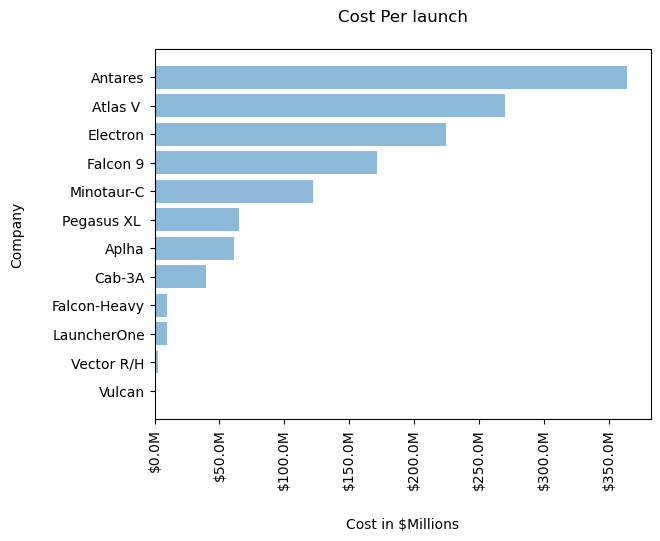

In [112]:
from matplotlib.ticker import FuncFormatter
plt.rcdefaults() 
fig, ax = plt.subplots()
def millions(x, pos):
    'The two args are the value and tick position'
    #return '$%1.1fM' % (x * 1e-6)
    return f'${x * 1e-6:1.1f}M'
formatter = FuncFormatter(millions)
ax.barh(clean_set_one['Vehicle'],clean_set_one['Average_Cost'].sort_values(ascending=False), alpha= 0.5)
ax=plt.gca()
#ax.set_xscale('log')
ax.invert_yaxis() 
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='x',rotation=90) 
plt.title("Cost Per launch", pad=20)
plt.ylabel("Company", labelpad=20)
plt.xlabel("Cost in $Millions", labelpad=20)
plt.show()

In [16]:
clean_set_one['Average_Capacity'] = clean_set_one['Min_Mass_to_LEO_KG'] + clean_set_one['Max_Mass_to_LEO_kg']/2
clean_set_one

,index,Vehicle,Operator,Year_of_First_Launch,Min_Mass_to_LEO_KG,Max_Mass_to_LEO_kg,Cost_Min,Cost_Max,Average_Cost,Average_Capacity
0,0,Antares,Orbital ATK,2013.0,3500.0,7000.0,80000000.0,85000000.0,122500000,7000.0
1,1,Atlas V,ULA and LMCLS,2002.0,8123.0,18814.0,110000000.0,230000000.0,225000000,17530.0
2,2,Electron,Rocket Lab,2017.0,0.0,150.0,164000000.0,400000000.0,364000000,75.0
3,3,Falcon 9,SpaceX,2010.0,0.0,13150.0,61200000.0,0.0,61200000,6575.0
4,4,Minotaur-C,Orbital ATK,2017.0,1278.0,1458.0,40000000.0,50000000.0,65000000,2007.0
5,5,Pegasus XL,Orbital ATK,1994.0,0.0,450.0,40000000.0,0.0,40000000,225.0
6,6,Aplha,Firefly Aerospace,0.0,0.0,1000.0,10000000.0,0.0,10000000,500.0
7,7,Cab-3A,CubeCeb,2017.0,0.0,5.0,250000.0,0.0,250000,2.5
8,8,Falcon-Heavy,SpaceX,2017.0,0.0,63800.0,270000000.0,0.0,270000000,31900.0
9,9,LauncherOne,Virgin Orbit,2017.0,0.0,500.0,10000000.0,0.0,10000000,250.0


In [41]:
clean_set_one['Average_Capacity'] = clean_set_one['Average_Capacity'].astype(int)
clean_set_one.dtypes

index                     int64
Vehicle                  object
Operator                 object
Year_of_First_Launch    float64
Min_Mass_to_LEO_KG      float64
Max_Mass_to_LEO_kg      float64
Cost_Min                float64
Cost_Max                float64
Average_Cost              int32
Average_Capacity          int32
Average_Per_KG            int32
dtype: object

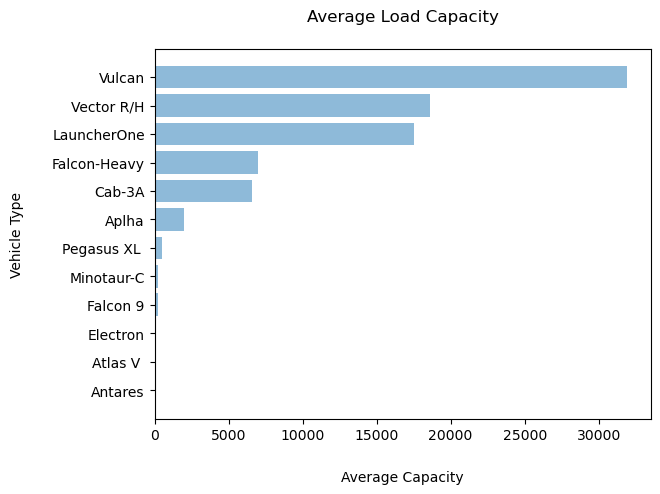

In [115]:
plt.rcdefaults() 
fig, ax = plt.subplots()

ax.barh(clean_set_one['Vehicle'],clean_set_one['Average_Capacity'].sort_values(ascending=True), alpha= 0.5)
ax=plt.gca()
#ax.set_xscale('log')
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)
ax.tick_params(axis='y') 
plt.title("Average Load Capacity", pad=20)
plt.ylabel("Vehicle Type", labelpad=20)
plt.xlabel("Average Capacity", labelpad=20)
plt.show()

In [19]:
clean_set_one['Average_Per_KG'] = clean_set_one['Average_Cost']/clean_set_one['Average_Capacity']
clean_set_one['Average_Per_KG'] = clean_set_one['Average_Per_KG'].astype(int)
clean_set_one

,index,Vehicle,Operator,Year_of_First_Launch,Min_Mass_to_LEO_KG,Max_Mass_to_LEO_kg,Cost_Min,Cost_Max,Average_Cost,Average_Capacity,Average_Per_KG
0,0,Antares,Orbital ATK,2013.0,3500.0,7000.0,80000000.0,85000000.0,122500000,7000,17500
1,1,Atlas V,ULA and LMCLS,2002.0,8123.0,18814.0,110000000.0,230000000.0,225000000,17530,12835
2,2,Electron,Rocket Lab,2017.0,0.0,150.0,164000000.0,400000000.0,364000000,75,4853333
3,3,Falcon 9,SpaceX,2010.0,0.0,13150.0,61200000.0,0.0,61200000,6575,9307
4,4,Minotaur-C,Orbital ATK,2017.0,1278.0,1458.0,40000000.0,50000000.0,65000000,2007,32386
5,5,Pegasus XL,Orbital ATK,1994.0,0.0,450.0,40000000.0,0.0,40000000,225,177777
6,6,Aplha,Firefly Aerospace,0.0,0.0,1000.0,10000000.0,0.0,10000000,500,20000
7,7,Cab-3A,CubeCeb,2017.0,0.0,5.0,250000.0,0.0,250000,2,125000
8,8,Falcon-Heavy,SpaceX,2017.0,0.0,63800.0,270000000.0,0.0,270000000,31900,8463
9,9,LauncherOne,Virgin Orbit,2017.0,0.0,500.0,10000000.0,0.0,10000000,250,40000


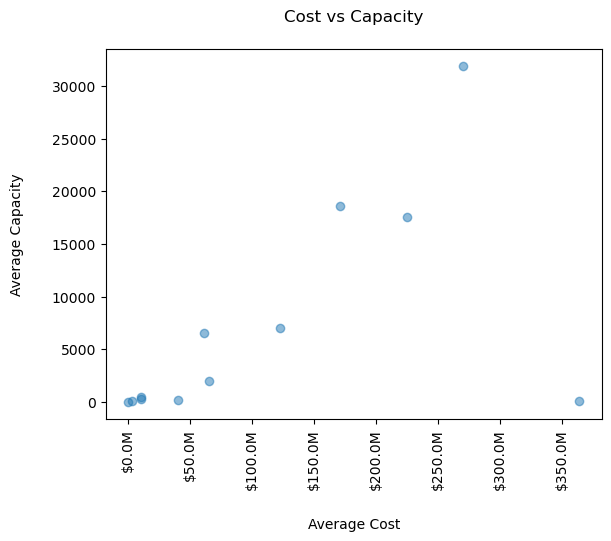

In [106]:
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    #return '$%1.1fM' % (x * 1e-6)
    return f'${x * 1e-6:1.1f}M'
formatter = FuncFormatter(millions)
plt.scatter(clean_set_one['Average_Cost'],clean_set_one['Average_Capacity'], alpha= 0.5)
ax=plt.gca()
#ax.set_yscale('log')

ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='x',labelrotation=90) 
plt.title("Cost vs Capacity", pad=20)
plt.xlabel("Average Cost", labelpad=20)
plt.ylabel("Average Capacity", labelpad=20)
plt.show()

In [21]:
clean_set_two = clean_set_one.copy()
clean_set_two

,index,Vehicle,Operator,Year_of_First_Launch,Min_Mass_to_LEO_KG,Max_Mass_to_LEO_kg,Cost_Min,Cost_Max,Average_Cost,Average_Capacity,Average_Per_KG
0,0,Antares,Orbital ATK,2013.0,3500.0,7000.0,80000000.0,85000000.0,122500000,7000,17500
1,1,Atlas V,ULA and LMCLS,2002.0,8123.0,18814.0,110000000.0,230000000.0,225000000,17530,12835
2,2,Electron,Rocket Lab,2017.0,0.0,150.0,164000000.0,400000000.0,364000000,75,4853333
3,3,Falcon 9,SpaceX,2010.0,0.0,13150.0,61200000.0,0.0,61200000,6575,9307
4,4,Minotaur-C,Orbital ATK,2017.0,1278.0,1458.0,40000000.0,50000000.0,65000000,2007,32386
5,5,Pegasus XL,Orbital ATK,1994.0,0.0,450.0,40000000.0,0.0,40000000,225,177777
6,6,Aplha,Firefly Aerospace,0.0,0.0,1000.0,10000000.0,0.0,10000000,500,20000
7,7,Cab-3A,CubeCeb,2017.0,0.0,5.0,250000.0,0.0,250000,2,125000
8,8,Falcon-Heavy,SpaceX,2017.0,0.0,63800.0,270000000.0,0.0,270000000,31900,8463
9,9,LauncherOne,Virgin Orbit,2017.0,0.0,500.0,10000000.0,0.0,10000000,250,40000


In [22]:
table_cost = tabula.read_pdf("resources\ICES_2018_81.pdf", multiple_tables=True\
    ,pages=8,lattice=True,area=[0,0,75,100],relative_area=True)
table_cost[0]

,System,First launch date,$k/kg,Reference
0,Ariane 44,1988,17.9,"Wertz and Larson, 1996"
1,Ariane 5G,1996,13.1,"Futron, 2002"
2,Athena 1,1995,31.7,"Wertz and Larson, 1996"
3,Athena 2,1995,16.6,"Futron, 2002"
4,Atlas IIA,1991,19.8,"Wertz and Larson, 1996"
5,Atlas-Centaur,1964,28.0,"Koelle, 1991"
6,Cosmos,1967,12.4,"Futron, 2002"
7,Delta 3910,1975,28.0,"Koelle, 1991"
8,Delta E,1960,167.8,"Koelle, 1991"
9,Delta II,1989,15.3,"Futron, 2002"


In [23]:
tabula.convert_into("resources\ICES_2018_81.pdf","resources\ICES_2018_81.csv",pages=8,\
    lattice=True,area=[0,0,75,100],relative_area=True,output_format="csv")

In [24]:
table_cost_csv = "resources\ICES_2018_81.csv"
table_cost = pd.read_csv(table_cost_csv)
table_cost

,System,First launch date,$k/kg,Reference
0,Ariane 44,1988,17.9,"Wertz and Larson, 1996"
1,Ariane 5G,1996,13.1,"Futron, 2002"
2,Athena 1,1995,31.7,"Wertz and Larson, 1996"
3,Athena 2,1995,16.6,"Futron, 2002"
4,Atlas IIA,1991,19.8,"Wertz and Larson, 1996"
5,Atlas-Centaur,1964,28.0,"Koelle, 1991"
6,Cosmos,1967,12.4,"Futron, 2002"
7,Delta 3910,1975,28.0,"Koelle, 1991"
8,Delta E,1960,167.8,"Koelle, 1991"
9,Delta II,1989,15.3,"Futron, 2002"


In [25]:
index_cost=table_cost.sort_values('First launch date')
index_cost.reset_index()

,index,System,First launch date,$k/kg,Reference
0,32,Vanguard,1957,894.7,"Koelle, 1991"
1,8,Delta E,1960,167.8,"Koelle, 1991"
2,24,Scout,1961,111.8,"Koelle, 1991"
3,29,Titan II,1962,31.0,"Wertz and Larson, 1996"
4,5,Atlas-Centaur,1964,28.0,"Koelle, 1991"
5,20,Proton SL-13,1965,4.1,"Wertz and Larson, 1996"
6,26,Soyuz,1966,7.6,"Futron, 2002"
7,23,Saturn IB,1966,17.3,"Koelle, 1991"
8,15,Kosmos,1967,8.0,"Wikipedia, Comparison, 2018"
9,6,Cosmos,1967,12.4,"Futron, 2002"


Text(0.5, 1.0, 'Launch Cost to Low Earth Orbit since 1950')

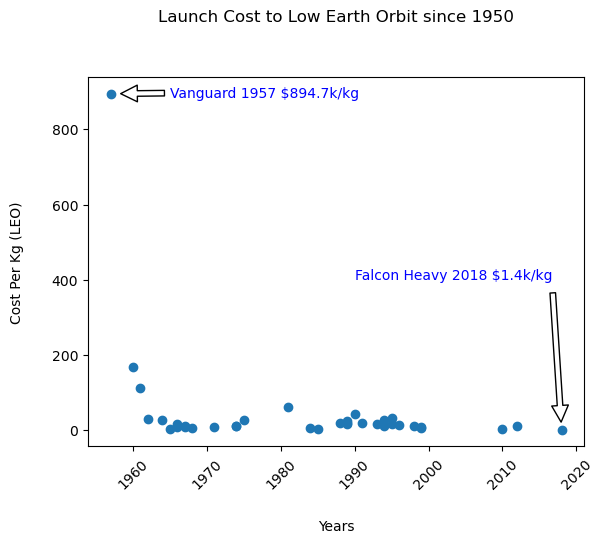

In [75]:
from numpy import array, log, pi
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.ticker as mticker

plt.scatter(index_cost['First launch date'],index_cost['$k/kg'], alpha= 1)
ax=plt.gca()
#ax.set_yscale('log')
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
tick_spacing = 10
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x',labelrotation=45) 
plt.annotate('Vanguard 1957 $894.7k/kg', 
            xy=(1958,894.7), 
            xytext=(1965, 885.7),color='b', 
            arrowprops = dict(facecolor='white', shrink=0.05))

plt.annotate('Falcon Heavy 2018 $1.4k/kg', 
            xy=(2018,2), 
            xytext=(1990, 400),color='b', 
            arrowprops = dict(facecolor='white', shrink=0.05))
ax.set_facecolor('w')
plt.xlabel('Years',labelpad=20)
plt.ylabel('Cost Per Kg (LEO)',labelpad=20)
plt.title('Launch Cost to Low Earth Orbit since 1950', pad=40)

In [53]:
drop_van = index_cost.reset_index()
drop_van = index_cost.sort_values('First launch date')
drop_van = index_cost.drop(32)
drop_van

,System,First launch date,$k/kg,Reference
8,Delta E,1960,167.8,"Koelle, 1991"
24,Scout,1961,111.8,"Koelle, 1991"
29,Titan II,1962,31.0,"Wertz and Larson, 1996"
5,Atlas-Centaur,1964,28.0,"Koelle, 1991"
20,Proton SL-13,1965,4.1,"Wertz and Larson, 1996"
26,Soyuz,1966,7.6,"Futron, 2002"
23,Saturn IB,1966,17.3,"Koelle, 1991"
15,Kosmos,1967,8.0,"Wikipedia, Comparison, 2018"
6,Cosmos,1967,12.4,"Futron, 2002"
22,Saturn V,1968,5.2,"Williams, 2016"


Text(0.5, 1.0, 'Launch Cost to Low Earth Orbit since 1950')

C:\Users\nikun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\nikun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


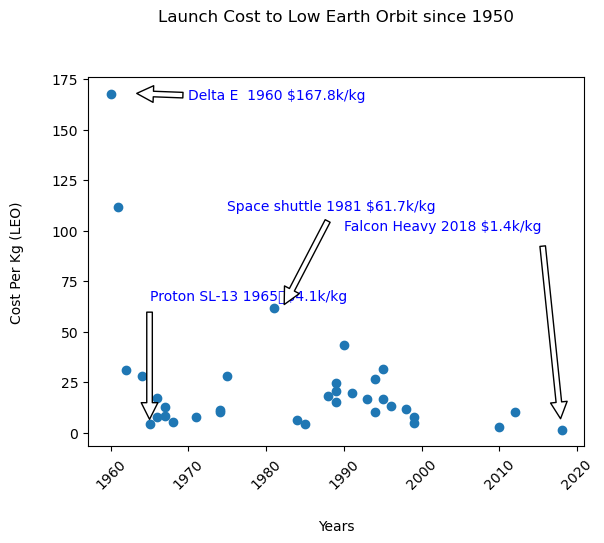

In [128]:
plt.scatter(drop_van['First launch date'],drop_van['$k/kg'], alpha= 1)
ax=plt.gca()
#ax.set_yscale('log')
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
tick_spacing = 10
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x',labelrotation=45) 

plt.annotate('Proton SL-13 1965	$4.1k/kg', 
            xy=(1965,3.5), 
            xytext=(1965, 65.5),color='b', 
            arrowprops = dict(facecolor='white', shrink=0.05))
plt.annotate('Delta E  1960 $167.8k/kg', 
            xy=(1963,168), 
            xytext=(1970, 165),color='b', 
            arrowprops = dict(facecolor='white', shrink=0.05))
plt.annotate('Space shuttle 1981 $61.7k/kg', 
            xy=(1982,61), 
            xytext=(1975, 110),color='b', 
            arrowprops = dict(facecolor='white', shrink=0.05))
plt.annotate('Falcon Heavy 2018 $1.4k/kg', 
            xy=(2018,2), 
            xytext=(1990, 100),color='b', 
            arrowprops = dict(facecolor='white', shrink=0.05))
ax.set_facecolor('w')
plt.xlabel('Years',labelpad=20)
plt.ylabel('Cost Per Kg (LEO)',labelpad=20)
plt.title('Launch Cost to Low Earth Orbit since 1950', pad=40)

[894.7, 167.8, 111.8, 31.0, 28.0, 4.1, 7.6, 17.3, 8.0, 12.4, 5.2, 7.7, 10.0, 11.2, 28.0, 61.7, 6.3, 4.4, 17.9, 24.7, 20.4, 15.3, 43.5, 19.8, 16.7, 26.4, 10.4, 16.6, 31.7, 13.1, 11.7, 4.9, 7.6, 2.7, 10.0, 1.4]


Text(0.5, 1.0, 'Launch Cost to Low Earth Orbit since 1950')

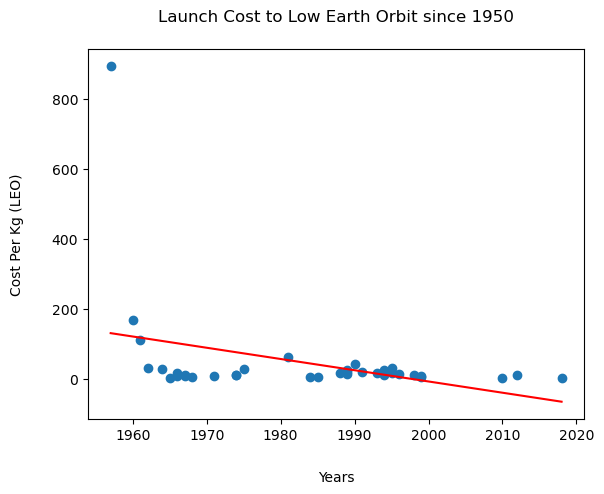

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats
from scipy.stats import linregress
import scipy.stats as st

x = index_cost['First launch date'].values.tolist()
y = index_cost['$k/kg'].values.tolist()
print(y)
plt.scatter(x, y)
slope, intercept, _, _, _, = st.linregress(x, y)
lin_regress_model_line = []
for i in x: 
    lin_regress_model_line.append(i * slope + intercept)
plt.
plt.plot(x,lin_regress_model_line,color="red")
plt.xlabel('Years',labelpad=20)
plt.ylabel('Cost Per Kg (LEO)',labelpad=20)
plt.title('Launch Cost to Low Earth Orbit since 1950', pad=20)
